# Query array of embedded documents
* To quary embedded fields inside documents use dot(.) operator
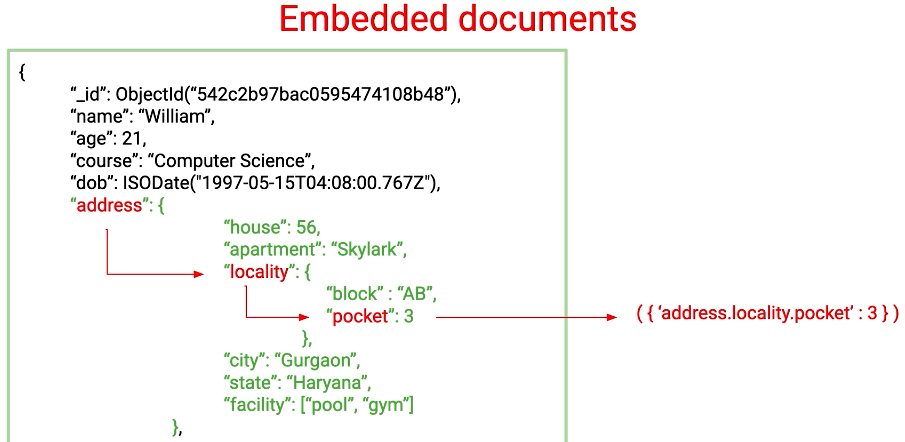







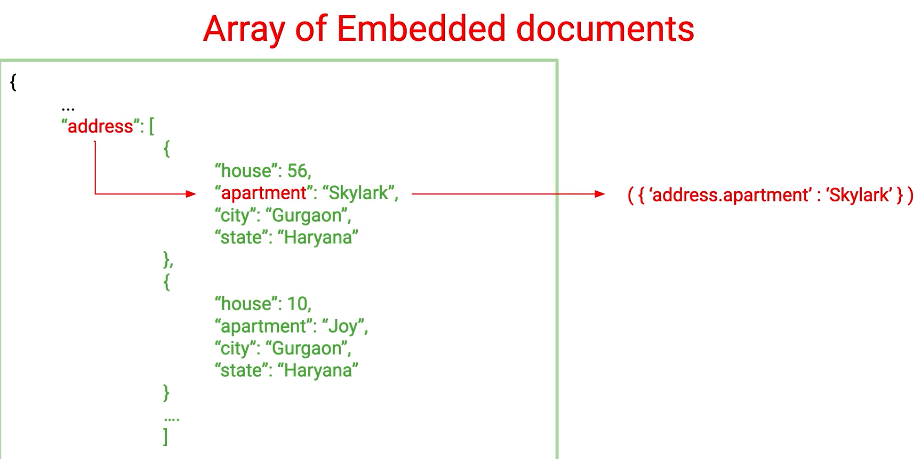

### Connecting to MongoDB

In [1]:
# Importing the required libraries
import pymongo
import pprint as pp

pp.sorted = lambda x, key=None: x

In [2]:
# Connect to the mongo client - Atlas Cluster
# client = pymongo.MongoClient('<connection_string>')

## Connect to local MongoDB server
# client = pymongo.MongoClient('mongodb://localhost:27017/')

In [3]:
# Choose a database
db = client.sample_analytics

In [4]:
# Sample document
pp.pprint(db.transactions.find_one())

{'_id': ObjectId('5ca4bbc1a2dd94ee58161cb1'),
 'account_id': 443178,
 'transaction_count': 66,
 'bucket_start_date': datetime.datetime(1969, 2, 4, 0, 0),
 'bucket_end_date': datetime.datetime(2017, 1, 3, 0, 0),
 'transactions': [{'date': datetime.datetime(2003, 9, 9, 0, 0),
                   'amount': 7514,
                   'transaction_code': 'buy',
                   'symbol': 'adbe',
                   'price': '19.1072802650074180519368383102118968963623046875',
                   'total': '143572.1039112657392422534031'},
                  {'date': datetime.datetime(2016, 6, 14, 0, 0),
                   'amount': 9240,
                   'transaction_code': 'buy',
                   'symbol': 'team',
                   'price': '24.1525632387771480580340721644461154937744140625',
                   'total': '223169.6843263008480562348268'},
                  {'date': datetime.datetime(2002, 12, 4, 0, 0),
                   'amount': 2824,
                   'transaction_code':

---

For example, 
* Retrieve documents where `transactions.amount` > 9000
    * It will return only those documents that contains atleast one transaction where amount is greater than 9000

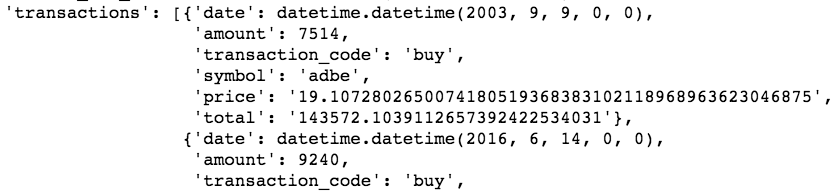

In [5]:
# Query embedded documents
pp.pprint(
    db.transactions.find_one(
                                 # query 
                                 {'transactions.amount':{'$gt':9000}}
                            )
)

{'_id': ObjectId('5ca4bbc1a2dd94ee58161cb1'),
 'account_id': 443178,
 'transaction_count': 66,
 'bucket_start_date': datetime.datetime(1969, 2, 4, 0, 0),
 'bucket_end_date': datetime.datetime(2017, 1, 3, 0, 0),
 'transactions': [{'date': datetime.datetime(2003, 9, 9, 0, 0),
                   'amount': 7514,
                   'transaction_code': 'buy',
                   'symbol': 'adbe',
                   'price': '19.1072802650074180519368383102118968963623046875',
                   'total': '143572.1039112657392422534031'},
                  {'date': datetime.datetime(2016, 6, 14, 0, 0),
                   'amount': 9240,
                   'transaction_code': 'buy',
                   'symbol': 'team',
                   'price': '24.1525632387771480580340721644461154937744140625',
                   'total': '223169.6843263008480562348268'},
                  {'date': datetime.datetime(2002, 12, 4, 0, 0),
                   'amount': 2824,
                   'transaction_code':

* `transactions` | name of array
* `amount` | name of field, within embedded documents, within array

---

* Project only `transactions.amount` and `transaction_count` fields


In [6]:
# Query embedded documents
pp.pprint(
    db.transactions.find_one(
                                 # query 
                                 {'transactions.amount':{'$gt':9000}},
                                 # project
                                 {
                                     'transaction_count':1,
                                     'transactions.amount':1 
                                 }
                            )
)

{'_id': ObjectId('5ca4bbc1a2dd94ee58161cb1'),
 'transaction_count': 66,
 'transactions': [{'amount': 7514},
                  {'amount': 9240},
                  {'amount': 2824},
                  {'amount': 7418},
                  {'amount': 5638},
                  {'amount': 6774},
                  {'amount': 7251},
                  {'amount': 8828},
                  {'amount': 5585},
                  {'amount': 5789},
                  {'amount': 7856},
                  {'amount': 8539},
                  {'amount': 4967},
                  {'amount': 2893},
                  {'amount': 9559},
                  {'amount': 8269},
                  {'amount': 8081},
                  {'amount': 6145},
                  {'amount': 6973},
                  {'amount': 3082},
                  {'amount': 2978},
                  {'amount': 9265},
                  {'amount': 9192},
                  {'amount': 7408},
                  {'amount': 3267},
                  {'amount':

---
**Multiple query conditions with array of embedded documents**

* Retrieve document where `amount < 5000` and `transaction_code` is `sell`


In [7]:
# Multiple conditions to query embedded documents

pp.pprint(
    db.transactions.find_one(
                                # query
                                {
                                    'transactions.amount':{'$lt':5000},
                                    'transactions.transaction_code':'sell'
                                },
                                # project
                                {
                                    'transactions':1,
                                    'account_id':1
                                }
                            )
)

{'_id': ObjectId('5ca4bbc1a2dd94ee58161cb1'),
 'account_id': 443178,
 'transactions': [{'date': datetime.datetime(2003, 9, 9, 0, 0),
                   'amount': 7514,
                   'transaction_code': 'buy',
                   'symbol': 'adbe',
                   'price': '19.1072802650074180519368383102118968963623046875',
                   'total': '143572.1039112657392422534031'},
                  {'date': datetime.datetime(2016, 6, 14, 0, 0),
                   'amount': 9240,
                   'transaction_code': 'buy',
                   'symbol': 'team',
                   'price': '24.1525632387771480580340721644461154937744140625',
                   'total': '223169.6843263008480562348268'},
                  {'date': datetime.datetime(2002, 12, 4, 0, 0),
                   'amount': 2824,
                   'transaction_code': 'buy',
                   'symbol': 'msft',
                   'price': '21.046193953245431629284212249331176280975341796875',
              

---
**`$` operator** 

Using [$](https://docs.mongodb.com/manual/reference/operator/projection/positional/#proj._S_) 
* an project first element in an array that matches conditions

For example, 
* Return first embedded document from `transactions` array field where `transaction.amount` < 5000 and `transaction.transaction_code` is `sell`

In [8]:
# Query

pp.pprint(
    db.transactions.find_one(
                                # query
                                {
                                    'transactions.amount':{'$lt':5000},
                                    'transactions.transaction_code':'sell'
                                },
                                # project
                                {
                                    'transactions.$':1,
                                    'account_id':1
                                }
    ))

{'_id': ObjectId('5ca4bbc1a2dd94ee58161cb1'),
 'account_id': 443178,
 'transactions': [{'date': datetime.datetime(2014, 7, 14, 0, 0),
                   'amount': 7418,
                   'transaction_code': 'sell',
                   'symbol': 'sap',
                   'price': '76.38514540536692720706923864781856536865234375',
                   'total': '566625.0086170118660220396123'}]}


* Above result did not consider same embedded document for both conditions
* It matched first condition in one embedded document and second condition in a different embedded document
    * `That is a limitation of array fields` 
    * `Multiple conditions may override each other internally and lead to undefined behavior`

----
**`elemMatch` operator**

* To make sure both conditions match same embedded document in the array, 
use  [$elemMatch](https://docs.mongodb.com/manual/reference/operator/query/elemMatch/#mongodb-query-op.-elemMatch) operator

For example, 
* Return first embedded document from array that matches condition where `amount` is less than 5000 and `transaction_code` is sell

In [9]:
# Query

pp.pprint(
    db.transactions.find_one(
                            # query
                            {
                            'transactions':{
                                            '$elemMatch':{
                                                            'amount':{'$lt':5000},
                                                            'transaction_code':'sell'
                                                            }
                                            }
                            },
                            # project
                            {
                                'transactions.$':1,
                                'account_id':1
                            }
    ))

{'_id': ObjectId('5ca4bbc1a2dd94ee58161cb1'),
 'account_id': 443178,
 'transactions': [{'date': datetime.datetime(2016, 7, 28, 0, 0),
                   'amount': 3082,
                   'transaction_code': 'sell',
                   'symbol': 'sap',
                   'price': '86.029571359374330086211557500064373016357421875',
                   'total': '265143.1389295916853257040202'}]}


----
### Question -

Retrieve those documents that contains a transaction made after 1st January 2003, have the 'transaction_code' as 'buy' and the 'amount' is greater than 7000. 

---

In [10]:
from datetime import datetime

In [11]:
# Question

cur = db.transactions.find(
                            # query
                            {
                            'transactions':{
                                            '$elemMatch':{
                                                            'date':{'$gt':datetime(2003,1,1)},
                                                            'amount':{'$gt':7000},
                                                            'transaction_code':'buy'
                                                            }
                                            }
                            },
                            # project
                            {
                                'transactions.$':1,
                                'account_id':1
                            }
    )

for doc in cur:
    pp.pprint(doc)

{'_id': ObjectId('5ca4bbc1a2dd94ee58161cb1'),
 'account_id': 443178,
 'transactions': [{'date': datetime.datetime(2003, 9, 9, 0, 0),
                   'amount': 7514,
                   'transaction_code': 'buy',
                   'symbol': 'adbe',
                   'price': '19.1072802650074180519368383102118968963623046875',
                   'total': '143572.1039112657392422534031'}]}
{'_id': ObjectId('5ca4bbc1a2dd94ee58161cb2'),
 'account_id': 716662,
 'transactions': [{'date': datetime.datetime(2008, 3, 19, 0, 0),
                   'amount': 8592,
                   'transaction_code': 'buy',
                   'symbol': 'amd',
                   'price': '6.25868566899633460565155473886989057064056396484375',
                   'total': '53774.62726801650693175815832'}]}
{'_id': ObjectId('5ca4bbc1a2dd94ee58161cb3'),
 'account_id': 557378,
 'transactions': [{'date': datetime.datetime(2011, 8, 23, 0, 0),
                   'amount': 7530,
                   'transaction_code':

{'_id': ObjectId('5ca4bbc1a2dd94ee58161d1d'),
 'account_id': 292314,
 'transactions': [{'date': datetime.datetime(2016, 12, 14, 0, 0),
                   'amount': 9918,
                   'transaction_code': 'buy',
                   'symbol': 'bb',
                   'price': '7.803544355148449795933629502542316913604736328125',
                   'total': '77395.55291436232507606973741'}]}
{'_id': ObjectId('5ca4bbc1a2dd94ee58161d1e'),
 'account_id': 120556,
 'transactions': [{'date': datetime.datetime(2009, 1, 21, 0, 0),
                   'amount': 8112,
                   'transaction_code': 'buy',
                   'symbol': 'amzn',
                   'price': '48.6835002073423908086624578572809696197509765625',
                   'total': '394920.5536819614742398698581'}]}
{'_id': ObjectId('5ca4bbc1a2dd94ee58161d1f'),
 'account_id': 719065,
 'transactions': [{'date': datetime.datetime(2004, 12, 29, 0, 0),
                   'amount': 8367,
                   'transaction_code':

                   'total': '226267.7057797397324634403049'}]}
{'_id': ObjectId('5ca4bbc1a2dd94ee58161db8'),
 'account_id': 644474,
 'transactions': [{'date': datetime.datetime(2003, 12, 17, 0, 0),
                   'amount': 7528,
                   'transaction_code': 'buy',
                   'symbol': 'ebay',
                   'price': '11.960677154311536440900454181246459484100341796875',
                   'total': '90039.97761765724632709861908'}]}
{'_id': ObjectId('5ca4bbc1a2dd94ee58161db9'),
 'account_id': 131885,
 'transactions': [{'date': datetime.datetime(2015, 12, 24, 0, 0),
                   'amount': 7072,
                   'transaction_code': 'buy',
                   'symbol': 'crm',
                   'price': '77.646440448573457615566439926624298095703125',
                   'total': '549115.6268523114922572858632'}]}
{'_id': ObjectId('5ca4bbc1a2dd94ee58161dba'),
 'account_id': 643375,
 'transactions': [{'date': datetime.datetime(2011, 4, 1, 0, 0),
             

{'_id': ObjectId('5ca4bbc1a2dd94ee58161e50'),
 'account_id': 946196,
 'transactions': [{'date': datetime.datetime(2015, 1, 20, 0, 0),
                   'amount': 9571,
                   'transaction_code': 'buy',
                   'symbol': 'goog',
                   'price': '506.2645416656092720586457289755344390869140625',
                   'total': '4845457.928281546342873298272'}]}
{'_id': ObjectId('5ca4bbc1a2dd94ee58161e51'),
 'account_id': 254176,
 'transactions': [{'date': datetime.datetime(2015, 8, 6, 0, 0),
                   'amount': 8392,
                   'transaction_code': 'buy',
                   'symbol': 'ebay',
                   'price': '28.292687895879002013543868088163435459136962890625',
                   'total': '237432.2368222165848976601410'}]}
{'_id': ObjectId('5ca4bbc1a2dd94ee58161e52'),
 'account_id': 962115,
 'transactions': [{'date': datetime.datetime(2005, 1, 13, 0, 0),
                   'amount': 7974,
                   'transaction_code': '

{'_id': ObjectId('5ca4bbc1a2dd94ee58161f02'),
 'account_id': 180092,
 'transactions': [{'date': datetime.datetime(2010, 3, 16, 0, 0),
                   'amount': 8934,
                   'transaction_code': 'buy',
                   'symbol': 'crm',
                   'price': '18.985308213179610703491562162525951862335205078125',
                   'total': '169614.7435765466420249936164'}]}
{'_id': ObjectId('5ca4bbc1a2dd94ee58161f03'),
 'account_id': 830030,
 'transactions': [{'date': datetime.datetime(2016, 5, 25, 0, 0),
                   'amount': 9812,
                   'transaction_code': 'buy',
                   'symbol': 'team',
                   'price': '22.52934579918692037381333648227155208587646484375',
                   'total': '221057.9409816220627078564576'}]}
{'_id': ObjectId('5ca4bbc1a2dd94ee58161f04'),
 'account_id': 916626,
 'transactions': [{'date': datetime.datetime(2016, 6, 9, 0, 0),
                   'amount': 9648,
                   'transaction_code':

                   'price': '19.764140932440767528532887808978557586669921875',
                   'total': '143191.2010555333607442207722'}]}
{'_id': ObjectId('5ca4bbc1a2dd94ee58161fb2'),
 'account_id': 382550,
 'transactions': [{'date': datetime.datetime(2010, 6, 22, 0, 0),
                   'amount': 7643,
                   'transaction_code': 'buy',
                   'symbol': 'adbe',
                   'price': '32.93379525053342149476520717144012451171875',
                   'total': '251712.9970998269404844904784'}]}
{'_id': ObjectId('5ca4bbc1a2dd94ee58161fb3'),
 'account_id': 406971,
 'transactions': [{'date': datetime.datetime(2015, 10, 27, 0, 0),
                   'amount': 8669,
                   'transaction_code': 'buy',
                   'symbol': 'ebay',
                   'price': '28.206772649747932746322476305067539215087890625',
                   'total': '244524.5121006648289778695471'}]}
{'_id': ObjectId('5ca4bbc1a2dd94ee58161fb4'),
 'account_id': 288877,
 

                   'total': '3419994.479127181218132136564'}]}
{'_id': ObjectId('5ca4bbc1a2dd94ee5816206e'),
 'account_id': 903675,
 'transactions': [{'date': datetime.datetime(2010, 6, 29, 0, 0),
                   'amount': 7483,
                   'transaction_code': 'buy',
                   'symbol': 'adbe',
                   'price': '27.756346672749604209684548550285398960113525390625',
                   'total': '207700.7421521852883010694768'}]}
{'_id': ObjectId('5ca4bbc1a2dd94ee5816206f'),
 'account_id': 614544,
 'transactions': [{'date': datetime.datetime(2011, 7, 1, 0, 0),
                   'amount': 7848,
                   'transaction_code': 'buy',
                   'symbol': 'ebay',
                   'price': '13.677841788878186690681104664690792560577392578125',
                   'total': '107343.7023591160091484653094'}]}
{'_id': ObjectId('5ca4bbc1a2dd94ee58162070'),
 'account_id': 500991,
 'transactions': [{'date': datetime.datetime(2013, 8, 1, 0, 0),
         

                   'price': '54.3035151999289524837877252139151096343994140625',
                   'total': '385120.5297978961310150225472'}]}
{'_id': ObjectId('5ca4bbc1a2dd94ee58162126'),
 'account_id': 852208,
 'transactions': [{'date': datetime.datetime(2009, 2, 11, 0, 0),
                   'amount': 9268,
                   'transaction_code': 'buy',
                   'symbol': 'adbe',
                   'price': '20.3510965398055105879393522627651691436767578125',
                   'total': '188613.9627309174721290219168'}]}
{'_id': ObjectId('5ca4bbc1a2dd94ee58162127'),
 'account_id': 219169,
 'transactions': [{'date': datetime.datetime(2015, 2, 4, 0, 0),
                   'amount': 7658,
                   'transaction_code': 'buy',
                   'symbol': 'sap',
                   'price': '65.08442362419890514502185396850109100341796875',
                   'total': '498416.5161141152156005773577'}]}
{'_id': ObjectId('5ca4bbc1a2dd94ee58162128'),
 'account_id': 320075,

                   'amount': 7577,
                   'transaction_code': 'buy',
                   'symbol': 'nvda',
                   'price': '17.472607626775296552068539313040673732757568359375',
                   'total': '132389.9479880764219750233224'}]}
{'_id': ObjectId('5ca4bbc1a2dd94ee581621c3'),
 'account_id': 201161,
 'transactions': [{'date': datetime.datetime(2010, 8, 11, 0, 0),
                   'amount': 7975,
                   'transaction_code': 'buy',
                   'symbol': 'bb',
                   'price': '56.14416618356082011587204760871827602386474609375',
                   'total': '447749.7253138975404240795797'}]}
{'_id': ObjectId('5ca4bbc1a2dd94ee581621c4'),
 'account_id': 639934,
 'transactions': [{'date': datetime.datetime(2011, 9, 29, 0, 0),
                   'amount': 9370,
                   'transaction_code': 'buy',
                   'symbol': 'ibm',
                   'price': '150.936117316534904375657788477838039398193359375',
         

                   'price': '23.993350375330322776790126226842403411865234375',
                   'total': '215772.1999253455927316736052'}]}
{'_id': ObjectId('5ca4bbc1a2dd94ee58162277'),
 'account_id': 232492,
 'transactions': [{'date': datetime.datetime(2011, 4, 20, 0, 0),
                   'amount': 7284,
                   'transaction_code': 'buy',
                   'symbol': 'crm',
                   'price': '34.1689399357584733252224395982921123504638671875',
                   'total': '248886.5584920647197009202500'}]}
{'_id': ObjectId('5ca4bbc1a2dd94ee58162278'),
 'account_id': 718678,
 'transactions': [{'date': datetime.datetime(2016, 7, 28, 0, 0),
                   'amount': 8859,
                   'transaction_code': 'buy',
                   'symbol': 'znga',
                   'price': '2.93123157682089097164634949876926839351654052734375',
                   'total': '25967.78053905627311781501021'}]}
{'_id': ObjectId('5ca4bbc1a2dd94ee58162279'),
 'account_id': 20

 'account_id': 551774,
 'transactions': [{'date': datetime.datetime(2010, 7, 22, 0, 0),
                   'amount': 9586,
                   'transaction_code': 'buy',
                   'symbol': 'msft',
                   'price': '21.39959432852517551282289787195622920989990234375',
                   'total': '205136.5112332423324659202990'}]}
{'_id': ObjectId('5ca4bbc1a2dd94ee58162303'),
 'account_id': 963591,
 'transactions': [{'date': datetime.datetime(2013, 11, 29, 0, 0),
                   'amount': 7702,
                   'transaction_code': 'buy',
                   'symbol': 'aapl',
                   'price': '73.04020227341106874519027769565582275390625',
                   'total': '562555.6379098120514754555188'}]}
{'_id': ObjectId('5ca4bbc1a2dd94ee58162304'),
 'account_id': 995034,
 'transactions': [{'date': datetime.datetime(2013, 7, 23, 0, 0),
                   'amount': 8980,
                   'transaction_code': 'buy',
                   'symbol': 'aapl',
     

In [12]:
# Count
db.transactions.find(
                        # query
                        {
                        'transactions':{
                                        '$elemMatch':{
                                                        'date':{'$gt':datetime(2003,1,1)},
                                                        'amount':{'$gt':7000},
                                                        'transaction_code':'buy'
                                                        }
                                        }
                        },
                        # project
                        {
                            'transactions.$':1,
                            'account_id':1
                        }
).count()


/home/avadmin/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  app.launch_new_instance()


1620

----
### Exercise 1 -

How many documents contain at least one transaction with where 'symbol' was either 'sap' or 'msft' and 'amount' was more than 8000.

---

----
### Exercise 2 -

How many documents contain at least one transaction where 'symbol' is neither 'goog' nor 'fb' and 'amount' is more than 9000.

---